# Solutions to some exercises

## Exercise I.7

> Let ω ∈ ℂ be a cube root of unity, the ring ℤ[ω] is also known as the Eisenstein integers. Determine all elliptic curves with complex multiplication by ℤ[ω].

Let's start with ω: we can use Sage's symbolic calculus engine to construct it as a complex number

In [1]:
w = e^(2*i*pi / 3)
w

1/2*I*sqrt(3) - 1/2

Careful, Sage's symbolic elements do not evaluate powers automatically:

In [2]:
w^3

(1/2*I*sqrt(3) - 1/2)^3

To verify ω³ = 1 we need to use the function `.expand()`

In [3]:
(w^3).expand()

1

Now, we can construct the order, and get its discriminant

In [4]:
O = ZZ[w]

In [5]:
O.discriminant()

-3

Of, course, we knew this already, because we knew the minimal polynomial of ω.

By the way, we could have used Sage's number fields, instead of the symbolic engine.

In [6]:
K.<w> = CyclotomicField(3)
K, w

(Cyclotomic Field of order 3 and degree 2, w)

In [7]:
w^3

1

In [8]:
chi = w.minpoly()
chi

x^2 + x + 1

In [9]:
chi.discriminant()

-3

Constructing the order also works

In [10]:
O = ZZ[w]
O

Order in Number Field in w0 with defining polynomial x^2 + x + 1 with w0 = -0.50000000000000000? + 0.866025403784439?*I

In [11]:
O.discriminant()

-3

Now, we can use the Hilbert class polynomial to get all the j-invariants with CM by -3

In [12]:
H = hilbert_class_polynomial(-3)
H

x

Clearly, the only root is j=0, so we learn that -3 has class number 1

In [13]:
H.roots()

[(0, 1)]

Hence, the only curve is defined over ℚ

In [14]:
E = EllipticCurve(j=0)
E

Elliptic Curve defined by y^2 + y = x^3 over Rational Field

In [15]:
E.has_cm()

True

In [16]:
E.cm_discriminant()

-3

By default, Sage does not use the short Weierstrass model (y² = x³ + ax + b) for CM elliptic curves. We can get one like this

In [17]:
E.short_weierstrass_model()

Elliptic Curve defined by y^2 = x^3 + 16 over Rational Field

But here is a more famous (non isomorphic) equation for j = 0

In [18]:
F = EllipticCurve([0,1])
F

Elliptic Curve defined by y^2 = x^3 + 1 over Rational Field

In [19]:
F.j_invariant()

0

In [20]:
E.is_isomorphic(F)

False

Let's find a prime of supersingular reduction for our curve. First, we must exclude primes of singular reduction

In [21]:
F.discriminant().factor()

-1 * 2^4 * 3^3

It would seem that the curve has singular reduction at 2 and 3, but actually Sage's preferred equation shows that 2 is not such a prime

In [22]:
E.discriminant().factor()

-1 * 3^3

and it turns out that it is indeed the only supersingular curve over 𝔽₂

In [23]:
E.change_ring(GF(2)).is_supersingular()

True

Let's try to find a prime p > 3 such that the curve has supseringular reduction. We need -3 to not be a square modulo p

In [24]:
GF(5)(-3).is_square()

False

In [25]:
Ebar = E.change_ring(GF(5))
Ebar

Elliptic Curve defined by y^2 + y = x^3 over Finite Field of size 5

In [26]:
Ebar.is_supersingular()

True

In [27]:
Ebar.trace_of_frobenius()

0

## Exercise II.6

Find a prime power $q$ and an elliptic curve $E/𝔽_q$ such that the 3-isogeny volcano
of $E$ is the same as the one below.

In [28]:
%%HTML
<svg   xmlns:dc="http://purl.org/dc/elements/1.1/"   xmlns:cc="http://creativecommons.org/ns#"   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"   xmlns:svg="http://www.w3.org/2000/svg"   xmlns="http://www.w3.org/2000/svg"   id="svg2564"   version="1.1"   viewBox="0 0 50.701473 50.843376"   height="50.843376mm"   width="50.701473mm">  <defs     id="defs2558" />  <metadata     id="metadata2561">    <rdf:RDF>      <cc:Work         rdf:about="">        <dc:format>image/svg+xml</dc:format>        <dc:type           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />        <dc:title></dc:title>      </cc:Work>    </rdf:RDF>  </metadata>  <g     transform="translate(13.255499,-109.04855)"     id="layer1">    <g       style="opacity:1;vector-effect:none;fill:#000000;fill-opacity:1;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"       transform="matrix(0.35277777,0,0,-0.35277777,-47.905526,134.47024)"       id="g18">      <path         d="m 192.73492,22.1615 c 0,2.75117 -2.23019,4.98138 -4.98138,4.98138 -2.75117,0 -4.98138,-2.23021 -4.98138,-4.98138 0,-2.75118 2.23021,-4.98139 4.98138,-4.98139 2.75119,0 4.98138,2.23021 4.98138,4.98139 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path20" />      <path         d="m 187.75354,22.1615 -23.97946,5.47377"         style="vector-effect:none;fill:#000000;fill-opacity:1;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path22" />      <path         d="m 187.75354,22.1615 26.64955,13.18463 m 2.98883,0 c 0,1.65071 -1.33813,2.98883 -2.98883,2.98883 -1.65071,0 -2.98883,-1.33812 -2.98883,-2.98883 0,-1.65071 1.33812,-2.98883 2.98883,-2.98883 1.6507,0 2.98883,1.33812 2.98883,2.98883 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path24" />      <path         d="m 214.40309,35.34613 17.05066,0.08737 m 0.99628,0 c 0,0.55025 -0.44605,0.99628 -0.99628,0.99628 -0.55025,0 -0.99628,-0.44603 -0.99628,-0.99628 0,-0.55023 0.44603,-0.99627 0.99628,-0.99627 0.55023,0 0.99628,0.44604 0.99628,0.99627 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path26" />      <path         d="m 214.40309,35.34613 11.08054,8.83655 m 0.99627,0 c 0,0.55023 -0.44604,0.99628 -0.99627,0.99628 -0.55023,0 -0.99628,-0.44605 -0.99628,-0.99628 0,-0.55025 0.44605,-0.99628 0.99628,-0.99628 0.55023,0 0.99627,0.44603 0.99627,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path28" />      <path         d="m 214.40309,35.34613 3.87879,16.60168 m 0.99627,0 c 0,0.55024 -0.44605,0.99628 -0.99627,0.99628 -0.55025,0 -0.99628,-0.44604 -0.99628,-0.99628 0,-0.55023 0.44603,-0.99627 0.99628,-0.99627 0.55022,0 0.99627,0.44604 0.99627,0.99627 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path30" />      <path         d="m 187.75354,22.1615 6.92409,28.9143 m 2.98883,0 c 0,1.65072 -1.33814,2.98884 -2.98883,2.98884 -1.65071,0 -2.98883,-1.33812 -2.98883,-2.98884 0,-1.65069 1.33812,-2.98882 2.98883,-2.98882 1.65069,0 2.98883,1.33813 2.98883,2.98882 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path32" />      <path         d="m 194.67763,51.0758 15.32113,7.4747 m 0.99628,0 c 0,0.55024 -0.44603,0.99628 -0.99628,0.99628 -0.55023,0 -0.99627,-0.44604 -0.99627,-0.99628 0,-0.55023 0.44604,-0.99627 0.99627,-0.99627 0.55025,0 0.99628,0.44604 0.99628,0.99627 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path34" />      <path         d="m 194.67763,51.0758 6.14917,12.76897 m 0.99627,0 c 0,0.55023 -0.44604,0.99628 -0.99627,0.99628 -0.55025,0 -0.99628,-0.44605 -0.99628,-0.99628 0,-0.55023 0.44603,-0.99627 0.99628,-0.99627 0.55023,0 0.99627,0.44604 0.99627,0.99627 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path36" />      <path         d="m 194.67763,51.0758 -3.70946,16.64019 m 0.99628,0 c 0,0.55023 -0.44605,0.99628 -0.99628,0.99628 -0.55023,0 -0.99627,-0.44605 -0.99627,-0.99628 0,-0.55023 0.44604,-0.99628 0.99627,-0.99628 0.55023,0 0.99628,0.44605 0.99628,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path38" />      <path         d="m 168.75546,27.63527 c 0,2.75117 -2.23021,4.98138 -4.98138,4.98138 -2.75118,0 -4.98138,-2.23021 -4.98138,-4.98138 0,-2.75117 2.2302,-4.98139 4.98138,-4.98139 2.75117,0 4.98138,2.23022 4.98138,4.98139 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path40" />      <path         d="M 163.77408,27.63527 144.54301,12.29832"         style="vector-effect:none;fill:#000000;fill-opacity:1;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path42" />      <path         d="m 163.77408,27.63527 6.30684,29.05749 m 2.98883,0 c 0,1.6507 -1.33814,2.98884 -2.98883,2.98884 -1.65072,0 -2.98883,-1.33814 -2.98883,-2.98884 0,-1.65071 1.33811,-2.98883 2.98883,-2.98883 1.65069,0 2.98883,1.33812 2.98883,2.98883 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path44" />      <path         d="m 170.08092,56.69276 10.56039,13.37839 m 0.99628,0 c 0,0.55023 -0.44603,0.99628 -0.99628,0.99628 -0.55023,0 -0.99628,-0.44605 -0.99628,-0.99628 0,-0.55023 0.44605,-0.99628 0.99628,-0.99628 0.55025,0 0.99628,0.44605 0.99628,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path46" />      <path         d="m 170.08092,56.69276 v 14.17319 m 0.99628,0 c 0,0.55023 -0.44605,0.99628 -0.99628,0.99628 -0.55025,0 -0.99628,-0.44605 -0.99628,-0.99628 0,-0.55025 0.44603,-0.99628 0.99628,-0.99628 0.55023,0 0.99628,0.44603 0.99628,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path48" />      <path         d="m 170.08092,56.69276 -10.56151,13.37839 m 0.99628,0 c 0,0.55023 -0.44603,0.99628 -0.99628,0.99628 -0.55023,0 -0.99628,-0.44605 -0.99628,-0.99628 0,-0.55023 0.44605,-0.99628 0.99628,-0.99628 0.55025,0 0.99628,0.44605 0.99628,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path50" />      <path         d="M 163.77408,27.63527 145.4842,51.07668 m 2.98884,0 c 0,1.65071 -1.33814,2.98882 -2.98884,2.98882 -1.6507,0 -2.98882,-1.33811 -2.98882,-2.98882 0,-1.65072 1.33812,-2.98884 2.98882,-2.98884 1.6507,0 2.98884,1.33812 2.98884,2.98884 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path52" />      <path         d="m 145.4842,51.07668 3.70945,16.63931 m 0.99628,0 c 0,0.55023 -0.44605,0.99628 -0.99628,0.99628 -0.55023,0 -0.99628,-0.44605 -0.99628,-0.99628 0,-0.55023 0.44605,-0.99628 0.99628,-0.99628 0.55023,0 0.99628,0.44605 0.99628,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path54" />      <path         d="m 145.4842,51.07668 -6.14916,12.76918 m 0.99627,0 c 0,0.55023 -0.44604,0.99627 -0.99627,0.99627 -0.55025,0 -0.99628,-0.44604 -0.99628,-0.99627 0,-0.55024 0.44603,-0.99628 0.99628,-0.99628 0.55023,0 0.99627,0.44604 0.99627,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path56" />      <path         d="m 145.4842,51.07668 -15.32114,7.47382 m 0.99627,0 c 0,0.55024 -0.44604,0.99628 -0.99627,0.99628 -0.55024,0 -0.99628,-0.44604 -0.99628,-0.99628 0,-0.55023 0.44604,-0.99627 0.99628,-0.99627 0.55023,0 0.99627,0.44604 0.99627,0.99627 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path58" />      <path         d="m 149.5244,12.29832 c 0,2.75119 -2.23021,4.98139 -4.98139,4.98139 -2.75117,0 -4.98138,-2.2302 -4.98138,-4.98139 0,-2.75117 2.23021,-4.98138 4.98138,-4.98138 2.75118,0 4.98139,2.23021 4.98139,4.98138 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path60" />      <path         d="m 144.54301,12.29832 -4.4e-4,-24.59664"         style="vector-effect:none;fill:#000000;fill-opacity:1;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path62" />      <path         d="m 144.54301,12.29832 -18.78427,23.04696 m 2.98883,0 c 0,1.65071 -1.33813,2.98882 -2.98883,2.98882 -1.65071,0 -2.98883,-1.33811 -2.98883,-2.98882 0,-1.65072 1.33812,-2.98883 2.98883,-2.98883 1.6507,0 2.98883,1.33811 2.98883,2.98883 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path64" />      <path         d="m 125.75874,35.34528 -3.87771,16.60145 m 0.99627,0 c 0,0.55023 -0.44603,0.99628 -0.99627,0.99628 -0.55023,0 -0.99628,-0.44605 -0.99628,-0.99628 0,-0.55023 0.44605,-0.99628 0.99628,-0.99628 0.55024,0 0.99627,0.44605 0.99627,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path66" />      <path         d="m 125.75874,35.34528 -11.08055,8.83632 m 0.99628,0 c 0,0.55023 -0.44603,0.99627 -0.99628,0.99627 -0.55023,0 -0.99627,-0.44604 -0.99627,-0.99627 0,-0.55024 0.44604,-0.99628 0.99627,-0.99628 0.55025,0 0.99628,0.44604 0.99628,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path68" />      <path         d="m 125.75874,35.34528 -17.04957,0.08822 m 0.99627,0 c 0,0.55025 -0.44603,0.99628 -0.99627,0.99628 -0.55023,0 -0.99628,-0.44603 -0.99628,-0.99628 0,-0.55023 0.44605,-0.99627 0.99628,-0.99627 0.55024,0 0.99627,0.44604 0.99627,0.99627 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path70" />      <path         d="m 144.54301,12.29832 -29.73181,0.31534 m 2.98883,0 c 0,1.65071 -1.33812,2.98884 -2.98883,2.98884 -1.65071,0 -2.98883,-1.33813 -2.98883,-2.98884 0,-1.65069 1.33812,-2.98883 2.98883,-2.98883 1.65071,0 2.98883,1.33814 2.98883,2.98883 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path72" />      <path         d="m 114.8112,12.61366 -10.69452,13.27481 m 0.99628,0 c 0,0.55023 -0.44604,0.99628 -0.99628,0.99628 -0.55023,0 -0.99628,-0.44605 -0.99628,-0.99628 0,-0.55023 0.44605,-0.99627 0.99628,-0.99627 0.55024,0 0.99628,0.44604 0.99628,0.99627 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path74" />      <path         d="m 114.8112,12.61366 -13.81743,3.15341 m 0.99628,0 c 0,0.55023 -0.44605,0.99628 -0.99628,0.99628 -0.55023,0 -0.99627,-0.44605 -0.99627,-0.99628 0,-0.55023 0.44604,-0.99627 0.99627,-0.99627 0.55023,0 0.99628,0.44604 0.99628,0.99627 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path76" />      <path         d="M 114.8112,12.61366 99.41608,5.29533 m 0.99627,0 c 0,0.55024 -0.44603,0.99628 -0.99627,0.99628 -0.55024,0 -0.99628,-0.44604 -0.99628,-0.99628 0,-0.55024 0.44604,-0.99627 0.99628,-0.99627 0.55024,0 0.99627,0.44603 0.99627,0.99627 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path78" />      <path         d="m 149.52396,-12.29832 c 0,2.75117 -2.2302,4.98138 -4.98139,4.98138 -2.75117,0 -4.98138,-2.23021 -4.98138,-4.98138 0,-2.75119 2.23021,-4.98139 4.98138,-4.98139 2.75119,0 4.98139,2.2302 4.98139,4.98139 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path80" />      <path         d="m 144.54257,-12.29832 19.23151,-15.33651"         style="vector-effect:none;fill:#000000;fill-opacity:1;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path82" />      <path         d="m 144.54257,-12.29832 -29.73224,-0.31621 m 2.98883,0 c 0,1.65071 -1.33812,2.98883 -2.98883,2.98883 -1.65071,0 -2.98883,-1.33812 -2.98883,-2.98883 0,-1.65071 1.33812,-2.98883 2.98883,-2.98883 1.65071,0 2.98883,1.33812 2.98883,2.98883 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path84" />      <path         d="m 114.81033,-12.61453 -15.39425,7.32028 m 0.99627,0 c 0,0.55023 -0.44603,0.99628 -0.99627,0.99628 -0.55024,0 -0.99628,-0.44605 -0.99628,-0.99628 0,-0.55023 0.44604,-0.99628 0.99628,-0.99628 0.55024,0 0.99627,0.44605 0.99627,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path86" />      <path         d="m 114.81033,-12.61453 -13.81765,-3.15364 m 0.99627,0 c 0,0.55024 -0.44604,0.99627 -0.99627,0.99627 -0.55024,0 -0.99628,-0.44603 -0.99628,-0.99627 0,-0.55023 0.44604,-0.99628 0.99628,-0.99628 0.55023,0 0.99627,0.44605 0.99627,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path88" />      <path         d="M 114.81033,-12.61453 104.1156,-25.88847 m 0.99628,0 c 0,0.55023 -0.44603,0.99627 -0.99628,0.99627 -0.55023,0 -0.99628,-0.44604 -0.99628,-0.99627 0,-0.55023 0.44605,-0.99628 0.99628,-0.99628 0.55025,0 0.99628,0.44605 0.99628,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path90" />      <path         d="m 144.54257,-12.29832 -18.78383,-23.04696 m 2.98883,0 c 0,1.65072 -1.33813,2.98883 -2.98883,2.98883 -1.65071,0 -2.98883,-1.33811 -2.98883,-2.98883 0,-1.65071 1.33812,-2.98882 2.98883,-2.98882 1.6507,0 2.98883,1.33811 2.98883,2.98882 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path92" />      <path         d="m 125.75874,-35.34528 -17.04957,-0.08715 m 0.99627,0 c 0,0.55024 -0.44603,0.99627 -0.99627,0.99627 -0.55023,0 -0.99628,-0.44603 -0.99628,-0.99627 0,-0.55024 0.44605,-0.99628 0.99628,-0.99628 0.55024,0 0.99627,0.44604 0.99627,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path94" />      <path         d="m 125.75874,-35.34528 -11.08055,-8.83632 m 0.99628,0 c 0,0.55024 -0.44603,0.99628 -0.99628,0.99628 -0.55023,0 -0.99627,-0.44604 -0.99627,-0.99628 0,-0.55023 0.44604,-0.99627 0.99627,-0.99627 0.55025,0 0.99628,0.44604 0.99628,0.99627 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path96" />      <path         d="m 125.75874,-35.34528 -3.87771,-16.60145 m 0.99627,0 c 0,0.55023 -0.44603,0.99628 -0.99627,0.99628 -0.55023,0 -0.99628,-0.44605 -0.99628,-0.99628 0,-0.55023 0.44605,-0.99628 0.99628,-0.99628 0.55024,0 0.99627,0.44605 0.99627,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path98" />      <path         d="m 168.75546,-27.63483 c 0,2.75118 -2.23021,4.98139 -4.98138,4.98139 -2.75118,0 -4.98138,-2.23021 -4.98138,-4.98139 0,-2.75119 2.2302,-4.98138 4.98138,-4.98138 2.75117,0 4.98138,2.23019 4.98138,4.98138 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path100" />      <path         d="m 163.77408,-27.63483 23.97989,5.47376"         style="vector-effect:none;fill:#000000;fill-opacity:1;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path102" />      <path         d="M 163.77408,-27.63483 145.4842,-51.07668 m 2.98884,0 c 0,1.65072 -1.33814,2.98884 -2.98884,2.98884 -1.6507,0 -2.98882,-1.33812 -2.98882,-2.98884 0,-1.65071 1.33812,-2.98882 2.98882,-2.98882 1.6507,0 2.98884,1.33811 2.98884,2.98882 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path104" />      <path         d="m 145.4842,-51.07668 -15.32114,-7.47382 m 0.99627,0 c 0,0.55023 -0.44604,0.99627 -0.99627,0.99627 -0.55024,0 -0.99628,-0.44604 -0.99628,-0.99627 0,-0.55024 0.44604,-0.99628 0.99628,-0.99628 0.55023,0 0.99627,0.44604 0.99627,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path106" />      <path         d="m 145.4842,-51.07668 -6.14916,-12.76918 m 0.99627,0 c 0,0.55024 -0.44604,0.99628 -0.99627,0.99628 -0.55025,0 -0.99628,-0.44604 -0.99628,-0.99628 0,-0.55023 0.44603,-0.99627 0.99628,-0.99627 0.55023,0 0.99627,0.44604 0.99627,0.99627 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path108" />      <path         d="m 145.4842,-51.07668 3.70945,-16.63931 m 0.99628,0 c 0,0.55023 -0.44605,0.99628 -0.99628,0.99628 -0.55023,0 -0.99628,-0.44605 -0.99628,-0.99628 0,-0.55023 0.44605,-0.99628 0.99628,-0.99628 0.55023,0 0.99628,0.44605 0.99628,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path110" />      <path         d="m 163.77408,-27.63483 6.30684,-29.05793 m 2.98883,0 c 0,1.65071 -1.33814,2.98883 -2.98883,2.98883 -1.65072,0 -2.98883,-1.33812 -2.98883,-2.98883 0,-1.6507 1.33811,-2.98884 2.98883,-2.98884 1.65069,0 2.98883,1.33814 2.98883,2.98884 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path112" />      <path         d="m 170.08092,-56.69276 -10.56151,-13.37839 m 0.99628,0 c 0,0.55023 -0.44603,0.99628 -0.99628,0.99628 -0.55023,0 -0.99628,-0.44605 -0.99628,-0.99628 0,-0.55023 0.44605,-0.99628 0.99628,-0.99628 0.55025,0 0.99628,0.44605 0.99628,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path114" />      <path         d="m 170.08092,-56.69276 v -14.17319 m 0.99628,0 c 0,0.55025 -0.44605,0.99628 -0.99628,0.99628 -0.55025,0 -0.99628,-0.44603 -0.99628,-0.99628 0,-0.55023 0.44603,-0.99628 0.99628,-0.99628 0.55023,0 0.99628,0.44605 0.99628,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path116" />      <path         d="m 170.08092,-56.69276 10.56039,-13.37839 m 0.99628,0 c 0,0.55023 -0.44603,0.99628 -0.99628,0.99628 -0.55023,0 -0.99628,-0.44605 -0.99628,-0.99628 0,-0.55023 0.44605,-0.99628 0.99628,-0.99628 0.55025,0 0.99628,0.44605 0.99628,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path118" />      <path         d="m 192.73535,-22.16107 c 0,2.75117 -2.23019,4.98138 -4.98138,4.98138 -2.75118,0 -4.98139,-2.23021 -4.98139,-4.98138 0,-2.75118 2.23021,-4.98139 4.98139,-4.98139 2.75119,0 4.98138,2.23021 4.98138,4.98139 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path120" />      <path         d="M 187.75397,-22.16107 198.42728,0"         style="vector-effect:none;fill:#000000;fill-opacity:1;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path122" />      <path         d="m 187.75397,-22.16107 6.92366,-28.91561 m 2.98883,0 c 0,1.65072 -1.33814,2.98884 -2.98883,2.98884 -1.65071,0 -2.98883,-1.33812 -2.98883,-2.98884 0,-1.65071 1.33812,-2.98882 2.98883,-2.98882 1.65069,0 2.98883,1.33811 2.98883,2.98882 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path124" />      <path         d="m 194.67763,-51.07668 -3.71054,-16.63931 m 0.99627,0 c 0,0.55023 -0.44603,0.99628 -0.99627,0.99628 -0.55024,0 -0.99628,-0.44605 -0.99628,-0.99628 0,-0.55023 0.44604,-0.99628 0.99628,-0.99628 0.55024,0 0.99627,0.44605 0.99627,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path126" />      <path         d="m 194.67763,-51.07668 6.14917,-12.76918 m 0.99627,0 c 0,0.55024 -0.44604,0.99628 -0.99627,0.99628 -0.55025,0 -0.99628,-0.44604 -0.99628,-0.99628 0,-0.55023 0.44603,-0.99627 0.99628,-0.99627 0.55023,0 0.99627,0.44604 0.99627,0.99627 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path128" />      <path         d="m 194.67763,-51.07668 15.32113,-7.47382 m 0.99628,0 c 0,0.55023 -0.44603,0.99627 -0.99628,0.99627 -0.55023,0 -0.99627,-0.44604 -0.99627,-0.99627 0,-0.55024 0.44604,-0.99628 0.99627,-0.99628 0.55025,0 0.99628,0.44604 0.99628,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path130" />      <path         d="m 187.75397,-22.16107 26.64912,-13.18506 m 2.98883,0 c 0,1.65071 -1.33813,2.98883 -2.98883,2.98883 -1.65071,0 -2.98883,-1.33812 -2.98883,-2.98883 0,-1.65071 1.33812,-2.98883 2.98883,-2.98883 1.6507,0 2.98883,1.33812 2.98883,2.98883 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path132" />      <path         d="m 214.40309,-35.34613 3.8777,-16.6006 m 0.99628,0 c 0,0.55023 -0.44605,0.99628 -0.99628,0.99628 -0.55023,0 -0.99627,-0.44605 -0.99627,-0.99628 0,-0.55023 0.44604,-0.99628 0.99627,-0.99628 0.55023,0 0.99628,0.44605 0.99628,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path134" />      <path         d="m 214.40309,-35.34613 11.08054,-8.83655 m 0.99627,0 c 0,0.55025 -0.44604,0.99628 -0.99627,0.99628 -0.55023,0 -0.99628,-0.44603 -0.99628,-0.99628 0,-0.55023 0.44605,-0.99628 0.99628,-0.99628 0.55023,0 0.99627,0.44605 0.99627,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path136" />      <path         d="m 214.40309,-35.34613 17.04956,-0.08737 m 0.99628,0 c 0,0.55023 -0.44605,0.99627 -0.99628,0.99627 -0.55023,0 -0.99627,-0.44604 -0.99627,-0.99627 0,-0.55025 0.44604,-0.99628 0.99627,-0.99628 0.55023,0 0.99628,0.44603 0.99628,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path138" />      <path         d="m 203.40866,0 c 0,2.75117 -2.23019,4.98138 -4.98138,4.98138 -2.75118,0 -4.98139,-2.23021 -4.98139,-4.98138 0,-2.75117 2.23021,-4.98138 4.98139,-4.98138 2.75119,0 4.98138,2.23021 4.98138,4.98138 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path140" />      <path         d="M 198.42728,0 187.75354,22.16107"         style="vector-effect:none;fill:#000000;fill-opacity:1;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path142" />      <path         d="m 198.42728,0 26.92334,-12.61453 m 2.98883,0 c 0,1.65071 -1.33812,2.98883 -2.98883,2.98883 -1.6507,0 -2.98883,-1.33812 -2.98883,-2.98883 0,-1.65071 1.33813,-2.98883 2.98883,-2.98883 1.65071,0 2.98883,1.33812 2.98883,2.98883 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path144" />      <path         d="m 225.35062,-12.61453 10.69452,-13.27394 m 0.99627,0 c 0,0.55023 -0.44604,0.99627 -0.99627,0.99627 -0.55024,0 -0.99628,-0.44604 -0.99628,-0.99627 0,-0.55023 0.44604,-0.99628 0.99628,-0.99628 0.55023,0 0.99627,0.44605 0.99627,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path146" />      <path         d="m 225.35062,-12.61453 13.81743,-3.15364 m 0.99627,0 c 0,0.55024 -0.44603,0.99627 -0.99627,0.99627 -0.55024,0 -0.99628,-0.44603 -0.99628,-0.99627 0,-0.55023 0.44604,-0.99628 0.99628,-0.99628 0.55024,0 0.99627,0.44605 0.99627,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path148" />      <path         d="m 225.35062,-12.61453 15.39512,7.3192 m 0.99628,0 c 0,0.55024 -0.44605,0.99627 -0.99628,0.99627 -0.55023,0 -0.99627,-0.44603 -0.99627,-0.99627 0,-0.55024 0.44604,-0.99628 0.99627,-0.99628 0.55023,0 0.99628,0.44604 0.99628,0.99628 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path150" />      <path         d="m 198.42728,0 26.92421,12.61366 m 2.98883,0 c 0,1.65071 -1.33812,2.98884 -2.98883,2.98884 -1.6507,0 -2.98883,-1.33813 -2.98883,-2.98884 0,-1.65069 1.33813,-2.98883 2.98883,-2.98883 1.65071,0 2.98883,1.33814 2.98883,2.98883 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path152" />      <path         d="m 225.35149,12.61366 15.39425,-7.31833 m 0.99628,0 c 0,0.55024 -0.44605,0.99628 -0.99628,0.99628 -0.55023,0 -0.99627,-0.44604 -0.99627,-0.99628 0,-0.55024 0.44604,-0.99627 0.99627,-0.99627 0.55023,0 0.99628,0.44603 0.99628,0.99627 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path154" />      <path         d="m 225.35149,12.61366 13.81765,3.15341 m 0.99628,0 c 0,0.55023 -0.44604,0.99628 -0.99628,0.99628 -0.55023,0 -0.99627,-0.44605 -0.99627,-0.99628 0,-0.55023 0.44604,-0.99627 0.99627,-0.99627 0.55024,0 0.99628,0.44604 0.99628,0.99627 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path156" />      <path         d="m 225.35149,12.61366 10.69473,13.27481 m 0.99628,0 c 0,0.55023 -0.44605,0.99628 -0.99628,0.99628 -0.55023,0 -0.99628,-0.44605 -0.99628,-0.99628 0,-0.55023 0.44605,-0.99627 0.99628,-0.99627 0.55023,0 0.99628,0.44604 0.99628,0.99627 z"         style="vector-effect:none;fill:#000000;fill-opacity:1;fill-rule:nonzero;stroke:#000000;stroke-width:0.3985;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"         id="path158" />    </g>  </g></svg>

We start from the crater: we look for some discriminants of class number 7, and we check whether (3) splits in the ring of integers

In [29]:
for i in range(1,1000):
    D = fundamental_discriminant(-i)
    if hilbert_class_polynomial(D).degree() == 7:
        print(D, GF(3)(D).is_square())

(-71, True)
(-151, False)
(-223, False)
(-251, True)
(-71, True)
(-463, False)
(-467, True)
(-487, False)
(-587, True)
(-151, False)
(-71, True)
(-811, False)
(-827, True)
(-859, False)
(-223, False)


We may thus choose D = -71

In [30]:
D = -71
H = hilbert_class_polynomial(-71)
H

x^7 + 313645809715*x^6 - 3091990138604570*x^5 + 98394038810047812049302*x^4 - 823534263439730779968091389*x^3 + 5138800366453976780323726329446*x^2 - 425319473946139603274605151187659*x + 737707086760731113357714241006081263

We now need to find a prime of ordinary reduction, and for the fun we also ask that the Hilbert class polynomial splits in $𝔽_p$, so that the curves are defined over it.

In [31]:
for p in primes(3, 1000):
    if GF(p)(D).is_square():
        Hp = H.change_ring(GF(p))
        if Hp.splitting_field('x').degree() == 1:
            print(p, Hp.is_squarefree())

(71, False)
(107, True)
(293, True)
(509, True)
(643, True)
(647, True)
(739, True)
(971, True)


71 is obviously an outlier, we may thus take 107. We get all the j-invariants by factoring the Hilbert class polynomial

In [32]:
p = 107
k = GF(p)
Hp = H.change_ring(k)
Hp.roots()

[(77, 1), (64, 1), (63, 1), (57, 1), (46, 1), (30, 1), (19, 1)]

In [33]:
E = EllipticCurve(j=GF(p)(77))
E

Elliptic Curve defined by y^2 = x^3 + 33*x + 58 over Finite Field of size 107

In [34]:
E.isogenies_prime_degree(3)

[Isogeny of degree 3 from Elliptic Curve defined by y^2 = x^3 + 33*x + 58 over Finite Field of size 107 to Elliptic Curve defined by y^2 = x^3 + 5*x + 76 over Finite Field of size 107,
 Isogeny of degree 3 from Elliptic Curve defined by y^2 = x^3 + 33*x + 58 over Finite Field of size 107 to Elliptic Curve defined by y^2 = x^3 + 15*x + 65 over Finite Field of size 107]

By looking at the list of rational isogenies, we see that only the crater is defined over $𝔽_p$. Let's investigate more. The factorization of the division polynomials gives us the generators of the kernels of the isogenies

In [35]:
E.division_polynomial(3).factor()

(3) * (x + 15) * (x + 49) * (x^2 + 43*x + 3)

However, by looking at the rational 3-torsion points, we see that only x = -15 defines a rational point, whereas x = -49 defines a point over a quadratic extension

In [36]:
E(0).division_points(3)

[(0 : 1 : 0), (92 : 19 : 1), (92 : 88 : 1)]

In [37]:
E.lift_x(-15)

(92 : 19 : 1)

In [38]:
E.change_ring(GF(p^2)).lift_x(-49)

(58 : 67*z2 + 80 : 1)

Said otherwise, the Frobenius π has two distinct eigenvalues ±1 modulo 3: x = -15 is associated to +1, while x = -49 is associated to -1. We can follow the crater along the direction +1 by taking at every step the isogeny defined by the unique $𝔽_p$-rational group of order $3$

In [39]:
EE = E
print(EE.j_invariant())
while True:
    P = EE(0).division_points(3)[1]
    EE = EE.isogeny(P).codomain()
    print(EE.j_invariant())
    if EE.j_invariant() == E.j_invariant():
        break

77
30
57
63
19
46
64
77


Let's draw the graph via a depth first search, for confirmation

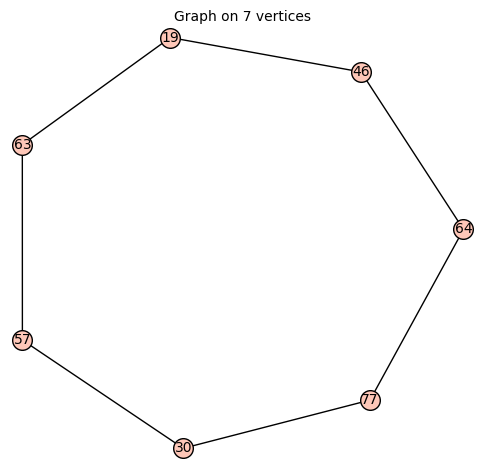

In [40]:
def explore(G, E):
    jE = E.j_invariant()
    G.add_vertex(jE)
    for i in E.isogenies_prime_degree(3):
        F = i.codomain()
        jF = F.j_invariant()
        if jF not in G:
            explore(G, F)
        G.add_edge(jE, jF)
    return G

explore(Graph(), E)

To get some vertical isogenies, we need to move to an algebraic extension. The factorization pattern of the division polynomial (or the matrix of π) suggests that an extension of degree 2 is enough.

In [41]:
EE = E.change_ring(GF(p^2))
G = explore(Graph(), EE)
G

Graph on 21 vertices (use the .plot() method to plot)

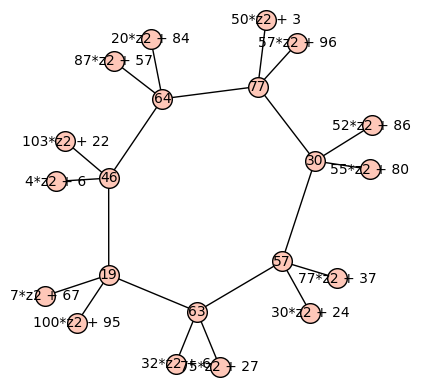

In [42]:
G.plot()

To get the last level, we need to take a new extension. By the general theory, we now know that the Frobenius endomorphism of any curve $E/𝔽_{p^2}$ on the bottom level must have matrix $\left(\begin{smallmatrix}1&1\\0&1\end{smallmatrix}\right) \mod 3$, and thus that $π^3=1\mod 3$. Thus, an extension of degree 3 will give the missing level.

In [43]:
EE = E.change_ring(GF(p^6))
G = explore(Graph(), EE)
G

Graph on 63 vertices (use the .plot() method to plot)

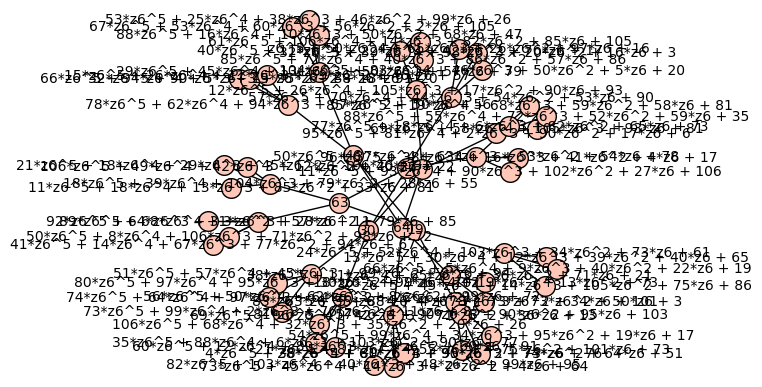

In [44]:
G.plot()

What if we want the full volcano to be defined over $𝔽_p$? Instead of focusing on the fundamental discriminant (associated to the crater), we may shoot directly for the class group of the lower level. Because the conductor of the lower level is 9, we look at $D = -71·9^2$

In [45]:
D*3^4

-5751

In [46]:
H = hilbert_class_polynomial(D*3^4)
H

x^42 + 29373489319796294798995014230863504612817776539125678959130838513526546481104742462853277256213605581879*x^41 + 3058163468249674092134318314328457246566814848408098728420245732555182858494620890703520701107979054721617574989443341575936803548*x^40 + 862801874820186997307744690295950815899955592192766483022322337489934033418247048543498367312835008700737203383817261194769269602230733833174736710791346557123201438140325015124198637367867827868952535259144*x^39 + 89828931972822997234783473721638128774939742632034046565142362257114451149444650357941828776836222174071656390202503505274795042601878424606027004029745557343254331738223159925930936298621912463663611600161409289866234348461847307582*x^38 + 4676181899438673517047819265572469899106637272954568829797411350349988373422139243276003586159595581284687101184634145740898369656746996789302546673022107231715164651026069374868315010945124178735607853310644164763344874516736964294061667306338209220582632251*x^37 + 14272464598348256626

As expected, the lower level has class number 42. We proceed like before.

In [47]:
for p in primes(3, 10000):
    if GF(p)(D*3^4).is_square():
        Hp = H.change_ring(GF(p))
        if Hp.splitting_field('x').degree() == 1:
            print(p, Hp.is_squarefree())

(71, False)
(5851, True)
(6007, True)
(6151, True)
(6427, True)
(6907, True)
(7351, True)
(7687, True)
(7867, True)
(8887, True)


In [48]:
hilbert_class_polynomial(D*3^4).change_ring(GF(5851)).factor()

(x + 106) * (x + 148) * (x + 248) * (x + 282) * (x + 642) * (x + 1032) * (x + 1062) * (x + 1140) * (x + 1392) * (x + 1441) * (x + 1618) * (x + 1879) * (x + 1941) * (x + 2223) * (x + 2595) * (x + 2596) * (x + 2741) * (x + 2745) * (x + 2773) * (x + 2788) * (x + 2835) * (x + 2899) * (x + 3064) * (x + 3525) * (x + 3593) * (x + 3655) * (x + 3679) * (x + 3710) * (x + 3712) * (x + 3789) * (x + 3846) * (x + 3862) * (x + 3915) * (x + 4009) * (x + 4155) * (x + 4210) * (x + 4262) * (x + 4543) * (x + 4592) * (x + 5527) * (x + 5591) * (x + 5657)

In [49]:
E = EllipticCurve(j=GF(5851)(-106))
G = explore(Graph(), E)
G

Graph on 63 vertices (use the .plot() method to plot)

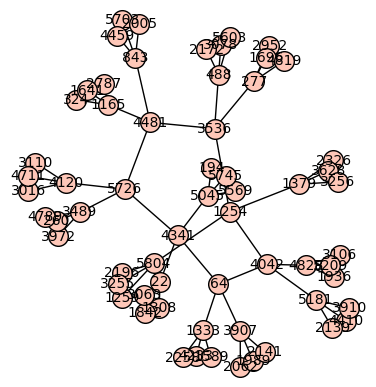

In [50]:
G.plot()